#**Name: Akash Badhautiya**

#**Roll No: 24AI60R43**


# 1. **Load and Prepare the Oxford-IIIT Pets Dataset [5 Marks]**
* Loading the Dataset
> Load the dataset from torchvision.datasets.OxfordIIITPet
*  Report Number of Classes
> Count Classes: Determine the number of unique pet breeds (classes) in the dataset.
* Visualize the Dataset
> Random Sample: Display one randomly picked image from each class to visualize the dataset.
* One-Hot Encoding of Labels
> Transform Labels: Convert class labels into one-hot encoded format.
* Resize Images
> Apply Resize: Use torchvision.transforms.Resize to resize all images to 128x128 pixels with bicubic interpolation.
* Class Distribution
> Plot Bar Graph: Plot a bar graph showing the distribution of classes to determine if the dataset is balanced or imbalanced.
# 2. **Data Splitting [1 Marks]**
* Split Dataset
> Partition: Divide the dataset into training (70%), validation (15%), and test sets (15%).
> Ensure Balanced Splits: Ensure that each partition maintains similar class distributions.
# 3. **Design a CNN Model [7 Marks]**
* Model Architecture
> Define Layers: Design a CNN with a suitable number of convolutional layers, MaxPooling layers, and fully connected layers.
> Adjust Filters: Choose appropriate numbers of filters and kernel sizes for each convolutional layer.
# 4. **Training the Model [5 Marks]**
* Loss Function
> Use an appropriate loss function for this classification task.
* Training Setup
> Optimizer: Use SGD with an appropriate learning rate and momentum.
> Learning Rate Scheduling: Apply torch.optim.lr_scheduler.ReduceLROnPlateau for learning rate scheduling.
> Batch Size: Choose a suitable batch size for training.
* Monitor Losses: Track training and validation losses during training.
# 5. **Evaluate the Model [2 Marks]**
* Test Set Performance
> Model Evaluation: Evaluate the trained model on the test set.
> Confusion Matrix: Generate and display the confusion matrix for the test set.



#Task 1


Task 1: Load and Prepare the Oxford-IIIT Pets Dataset

1.1. Loading the Dataset

In [1]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# Define transformations for resizing and converting to tensor
transform = transforms.Compose([
    transforms.Resize((128, 128), interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.ToTensor(),
])

# Load the Oxford-IIIT Pets dataset
dataset = datasets.OxfordIIITPet(root='./data', split='trainval', download=True, transform=transform)


100%|██████████| 791918971/791918971 [00:24<00:00, 32612568.46it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 16137086.40it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


1.2. Report Number of Classes

In [2]:
# Number of classes
num_classes = len(dataset.classes)
print(f'Number of classes: {num_classes}')


Number of classes: 37


1.3. Visualize the Dataset

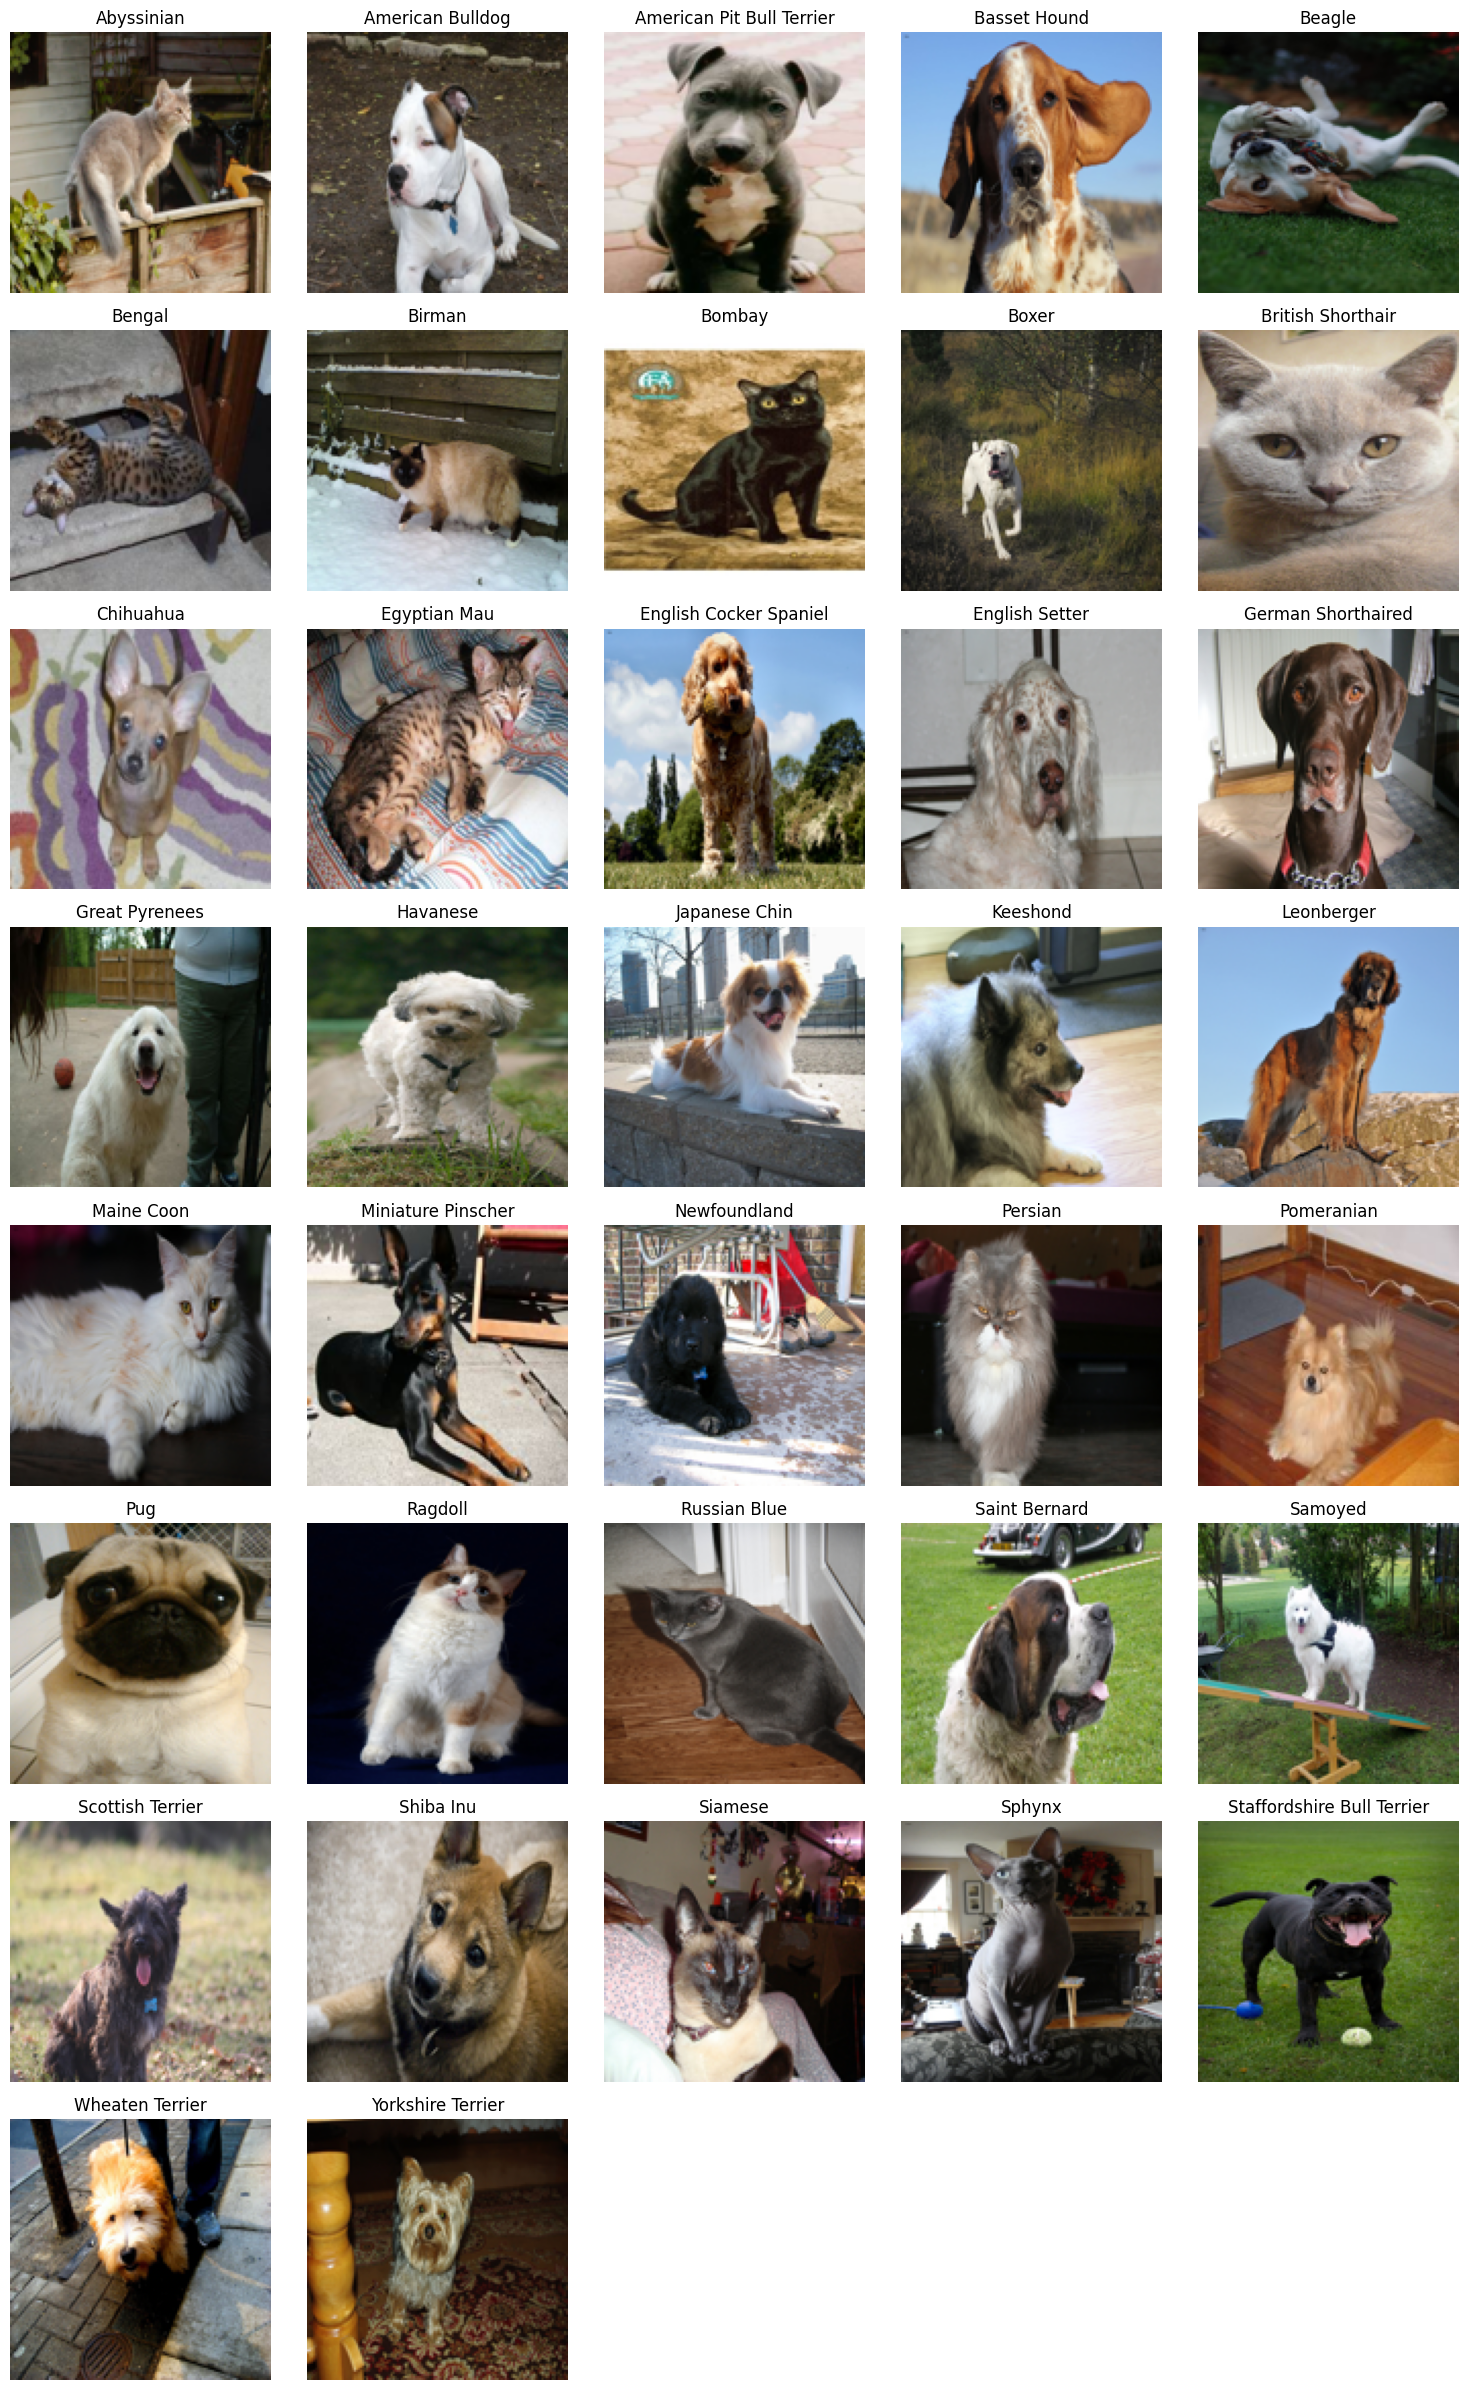

In [3]:
import random
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# Create a dictionary to store indices for each class
class_indices = {i: [] for i in range(num_classes)}

# Populate the dictionary with indices
for idx, (_, label) in enumerate(dataset):
    class_indices[label].append(idx)

# Determine the number of rows and columns for the subplot grid
num_rows = (num_classes + 4) // 5  # 5 columns, adjust as needed
num_cols = min(num_classes, 5)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()  # Flatten to easily index

# Plot one randomly picked image from each class
for i in range(num_classes):
    indices = class_indices[i]
    idx = random.choice(indices)
    img, _ = dataset[idx]
    axes[i].imshow(ToPILImage()(img))
    axes[i].set_title(dataset.classes[i])
    axes[i].axis('off')

# Turn off any unused subplots
for j in range(num_classes, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


1.4. One-Hot Encoding of Labels

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Extract labels and apply one-hot encoding
labels = np.array([label for _, label in dataset]).reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = encoder.fit_transform(labels)


1.5. Resize Images

In [7]:
#This is already handled by the transformation applied during dataset loading.

1.6. Class Distribution

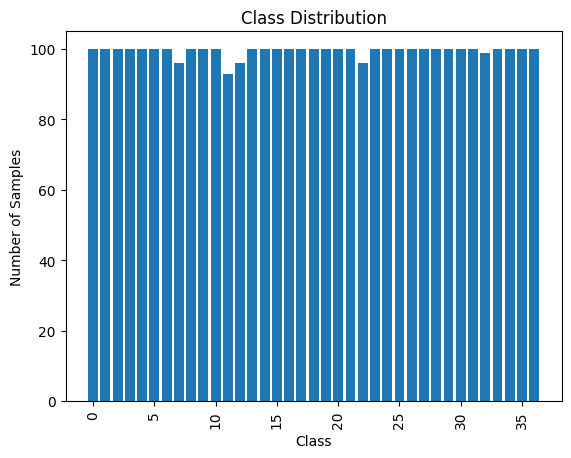

In [8]:
from collections import Counter

# Calculate and plot class distribution
class_counts = Counter(labels.flatten())
classes, counts = zip(*class_counts.items())

plt.bar(classes, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


Task 2: Data Splitting

2.1. Split Dataset

In [9]:
import torch
from torch.utils.data import DataLoader, random_split

# Set random seed for reproducibility
np.random.seed(42)

# Determine the sizes for training, validation, and test sets
dataset_size = len(dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Task 3: Design a CNN Model

3.1. Define Model Architecture

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()


Task 4: Training the Model

4.1. Define Loss Function, Optimizer, and Scheduler

In [11]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Define the loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min')


4.2. Train the Model

Epoch [1/10], Train Loss: 3.6134, Val Loss: 3.6100
Epoch [2/10], Train Loss: 3.5873, Val Loss: 3.5330
Epoch [3/10], Train Loss: 3.4784, Val Loss: 3.4236
Epoch [4/10], Train Loss: 3.4012, Val Loss: 3.3596
Epoch [5/10], Train Loss: 3.3522, Val Loss: 3.3663
Epoch [6/10], Train Loss: 3.2654, Val Loss: 3.3157
Epoch [7/10], Train Loss: 3.1758, Val Loss: 3.2989
Epoch [8/10], Train Loss: 3.0697, Val Loss: 3.2844
Epoch [9/10], Train Loss: 2.9195, Val Loss: 3.2030
Epoch [10/10], Train Loss: 2.7583, Val Loss: 3.1993


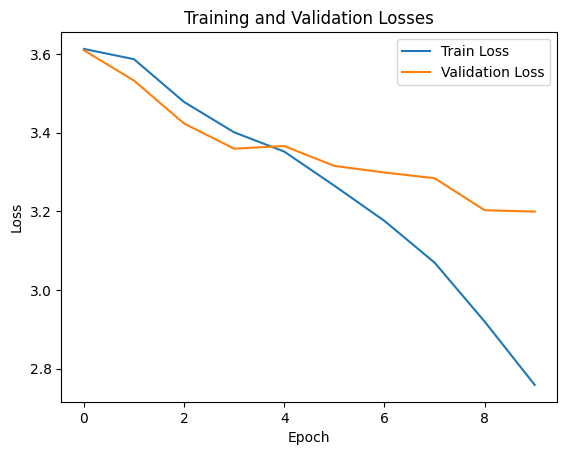

In [12]:
num_epochs = 10

# Lists to store training and validation losses
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

    epoch_val_loss = running_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    # Learning rate scheduling
    scheduler.step(epoch_val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

# Plot the training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


Task 5: Evaluate the Model

5.1. Evaluate on Test Set

Test Set Accuracy: 13.41%


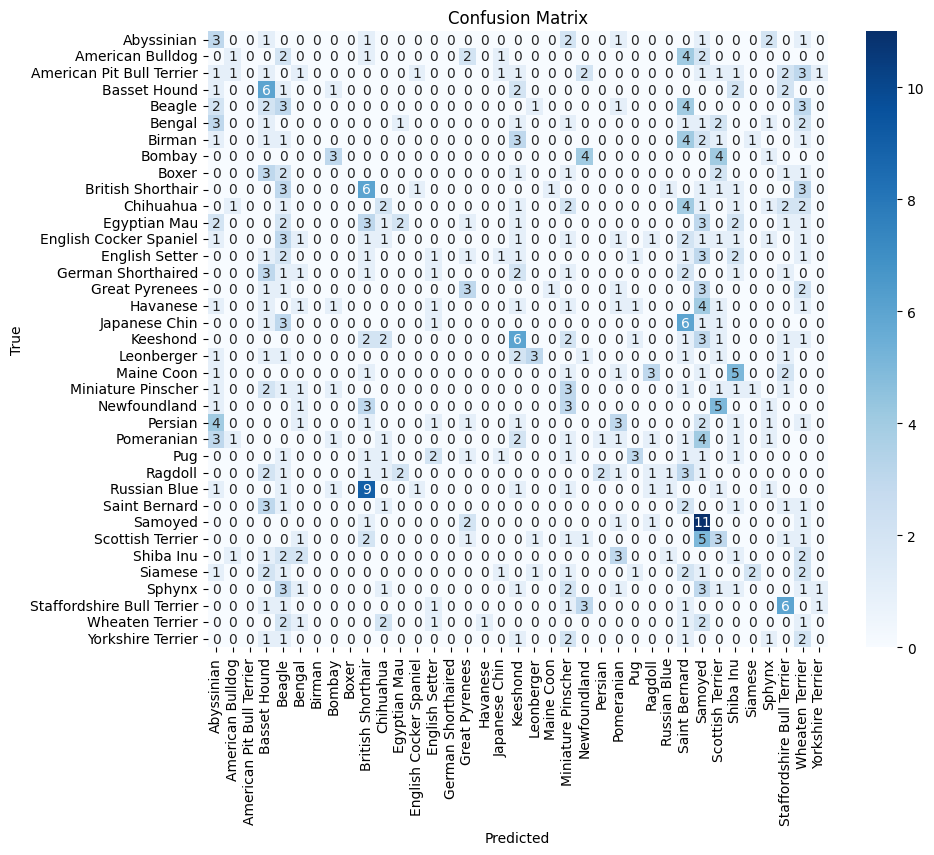

In [15]:
import torch
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure the model is in evaluation mode
model.eval()

# Store predictions and true labels
all_preds = []
all_labels = []

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Define device here

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)  # Move to GPU if available
        labels = labels.to(device)

        # Forward pass
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)  # Get the index of the max log-probability

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()